In [1]:
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator ,load_img
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [3]:
#Importing Data from CSV file
data=pd.read_csv("fer2013.csv")

In [4]:
labels=data.iloc[:,[0]].values

In [5]:
pixels=data['pixels']

In [6]:
#Facial Expressions
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}
from keras.utils import to_categorical 
labels = to_categorical(labels,len(Expressions))

In [7]:
#converting pixels to Gray Scale images of 48X48 
images = np.array([np.fromstring(pixel, dtype=int, sep=" ")for pixel in pixels])
images=images/255.0
images = images.reshape(images.shape[0],48,48,1).astype('float32')

'Disgust'

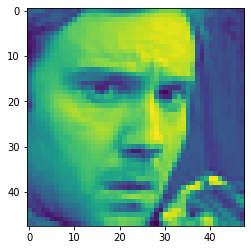

In [8]:
plt.imshow(images[0][:,:,0])
Expressions[labels[0][0]]

In [9]:
#splitting data into training and test data
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=0)

In [10]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model 

In [12]:
classes=7
model = create_convolutional_model(classes)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 47, 47, 32)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
batch_normalization_2

In [13]:
#train the CNN 
model.fit(train_images,train_labels,batch_size=105,epochs=30,verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 2053s - loss: 1.8326 - acc: 0.3459
Epoch 2/30
 - 2998s - loss: 1.4687 - acc: 0.4505
Epoch 3/30
 - 3460s - loss: 1.2991 - acc: 0.5048
Epoch 4/30
 - 5790s - loss: 1.1877 - acc: 0.5484
Epoch 5/30
 - 2138s - loss: 1.1117 - acc: 0.5762
Epoch 6/30
 - 2033s - loss: 1.0390 - acc: 0.6090
Epoch 7/30
 - 6710s - loss: 0.9691 - acc: 0.6364
Epoch 8/30
 - 1943s - loss: 0.8969 - acc: 0.6648
Epoch 9/30
 - 1958s - loss: 0.8366 - acc: 0.6904
Epoch 10/30
 - 1977s - loss: 0.7363 - acc: 0.7272
Epoch 11/30
 - 2072s - loss: 0.6457 - acc: 0.7639
Epoch 12/30
 - 1956s - loss: 0.5637 - acc: 0.7938
Epoch 13/30
 - 1950s - loss: 0.4886 - acc: 0.8209
Epoch 14/30
 - 1890s - loss: 0.4206 - acc: 0.8475
Epoch 15/30
 - 1936s - loss: 0.3718 - acc: 0.8662
Epoch 16/30
 - 1909s - loss: 0.3247 - acc: 0.8845
Epoch 17/30
 - 1908s - loss: 0.2988 - acc: 0.8945
Epoch 18/30
 - 1906s - loss: 0.2765 - acc: 0.9002
Epoch 19/30
 - 1899s - loss: 0.2853 - acc: 0.9018
Epoch 20/30

In [14]:
label_pred=model.predict(test_images)
label_pred=np.argmax(label_pred,axis = 1)

Normalized confusion matrix
[[0.56503642 0.00416233 0.07284079 0.08844953 0.15712799 0.02289282
  0.08949011]
 [0.29245283 0.44339623 0.0754717  0.         0.11320755 0.02830189
  0.04716981]
 [0.1640159  0.00099404 0.35884692 0.05765408 0.22166998 0.08548708
  0.11133201]
 [0.02830702 0.         0.01796407 0.82471421 0.06260207 0.01197605
  0.05443658]
 [0.14036479 0.00237906 0.09278351 0.07137193 0.53846154 0.00951626
  0.14512292]
 [0.04255319 0.         0.05757196 0.07509387 0.03629537 0.74217772
  0.04630788]
 [0.12582781 0.00165563 0.06043046 0.08195364 0.19619205 0.01076159
  0.52317881]]


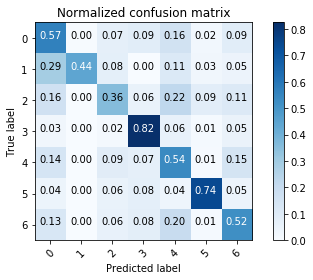

In [15]:
#making confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

test_labels=np.argmax(test_labels,axis=1)
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,label_pred)
class_names=Expressions
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [16]:
#Save the weights
filename='model_weights.hdf5'
model.save_weights(filename,overwrite=True)

In [17]:
#Save the weights
filename='model_weights.hdf5'
model.load_weights(filename)

In [18]:
import cv2
def make_prediction(unknown):
    unknown=cv2.resize(unknown,(48,48))
    unknown=unknown/255.0
    unknown=np.array(unknown).reshape(-1,48,48,1)
    predict=np.argmax(model.predict(unknown),axis = 1)
    return predict[0]  

In [19]:
def face_in_video():
    face_cascade = cv2.CascadeClassifier("cascades\data\haarcascade_frontalface_default.xml")
    cap=cv2.VideoCapture(0)
    while True:
        ret,img=cap.read()  
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        
        for (x,y,w,h) in faces:
            sub_face = gray[y:y+h, x:x+w]
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            res=make_prediction(sub_face)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(Expressions[res]),(x,y-5),font,0.5,(205,200,50),1,cv2.LINE_AA)
        cv2.imshow('img',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()  

In [36]:
face_in_video()